# Workplace interaction

In [1]:
%load_ext autoreload
%autoreload 2

Import some plotting libraries and set some defaults:

In [2]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
np.random.seed(42)

> **Tip:**  
> Producing figures in svg format (scalable vector graphics) makes for sharp plots on webpages. However, if you make plots with thousands of observations you should set this to `'png'` instead:

In [3]:
%config InlineBackend.figure_formats = ['svg'] 

## Sampling

In [4]:
subjects = pd.read_csv('../../data/data_table.csv')
sample_size = subjects.shape[0]

> **Tip:**  
> By adding a label and caption to a cell displaying a table, you can refer to that table elsewhere and insert it in a manuscript.

In [5]:
#| label: tbl-subjects
#| tbl-cap: "People included in the analysis."
subjects

,name,age,sex,position,nationality
0,Julie,27,F,PhDstudent,DK
1,Thomas,33,M,Postdoc,GB
2,Emilie,23,F,PhDstudent,CH
3,Sofie,31,F,Postdoc,DK
4,Sara,29,F,Postdoc,US
5,Cecilie,34,F,Postdoc,DK
6,Anders,32,M,PhDstudent,UK
7,Emma,42,F,Professor,DK
8,Caroline,31,F,PhDstudent,DK
9,Laura,30,F,Postdoc,DK


> **Tip:**  
> By generaing markdown for descriptions that will eventually end up in the manuscript, you can imbed python values. It also ensures that the manuscript exactly reflects the notebook.

In [6]:
#| echo: false
#| label: doc-sampling
Markdown(f"""

The {sample_size} subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
""")



The 24 subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 


## Interviews

In interviewed `{python} sample_size` workplace individuals were interviewed by .... blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 
blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 

In [7]:

#| label: tbl-measured-informality
#| tbl-cap: "Informality quantified for subjects in the study."

df = pd.DataFrame({'name': subjects.name, 
                   'seniority': np.random.randint(0, 5, sample_size), 
                   'age': subjects.age})
df['informality'] = np.random.normal(loc=10, scale=1, size=sample_size)
df

,name,seniority,age,informality
0,Julie,3,27,10.816445
1,Thomas,4,33,8.476124
2,Emilie,2,23,9.571954
3,Sofie,4,31,9.257593
4,Sara,4,29,9.296656
5,Cecilie,1,34,7.860379
6,Anders,2,32,9.370525
7,Emma,2,42,10.597720
8,Caroline,2,31,12.559488
9,Laura,4,30,10.394233


In [8]:
#| label: tbl-mean-informality
#| tbl-cap: "Mean interaction scores by seniority and age"
df.groupby(['seniority']).mean(numeric_only=True).reset_index()

,seniority,age,informality
0,0,38.500000,10.279172
1,1,31.750000,9.485702
2,2,31.000000,10.316850
3,3,38.833333,9.822917
4,4,31.000000,9.578849


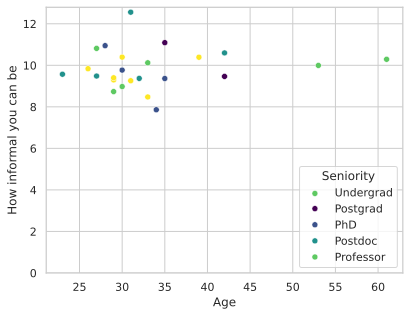

In [9]:
#| label: fig-danish-interaction
#| fig-cap: "Interaction among Danes: How Danes interact is has very little to do with age and seniority, compared to most other contries."

sns.scatterplot(x='age', y='informality', data=df, hue='seniority', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age')
plt.legend(title='Seniority', loc='lower right', labels=['Undergrad', 'Postgrad', 'PhD', 'Postdoc', 'Professor'])
plt.ylim(bottom=0) ;

Seems Danish people act very informally unaffected by age and seniority.

In [10]:
informality_age_cor = df.informality.corr(df.age)
informality_age_cor

np.float64(0.10942859782514114)

In [11]:
informality_seniority_cor = df.informality.corr(df.seniority)
informality_seniority_cor

np.float64(-0.13673439318448924)

In [12]:
#| echo: false
#| label: doc-formality-correlation
Markdown(f"""
         
The correlation between informality and age was {round(informality_age_cor, 3)} and the correlation 
between informality and seniority was {round(informality_seniority_cor, 3)}.

""")



The correlation between informality and age was 0.109 and the correlation 
between informality and seniority was -0.137.



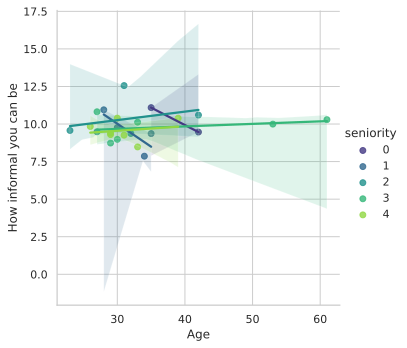

In [13]:
#| label: fig-danish-interaction-regressions
#| fig-cap: "Interaction among Danes: Regressions of informality against age for five levels of seniority."

sns.lmplot(x='age', y='informality', data=df, hue='seniority', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age') ;